In [18]:
from shutil import copyfile
#copyfile('../back_last_time.hdf5' , '../every.best.hdf5')
copyfile('../every.best.hdf5', '../back_last_time.87.33.hdf5')



'../back_last_time.87.33.hdf5'

In [226]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint


# path to the model weights files.
top_model_weights_path = '../vgg16_weights.h5'
filepath='../every.best.hdf5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '../dataset/training_set/smo'
validation_data_dir = '../dataset/test_set/smo'

nb_train_samples = 2000
nb_validation_samples = 300
epochs = 50
batch_size = 16


In [227]:

# build the VGG16 network
#model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
print('base_model loaded.')


base_model loaded.


In [228]:
# build a classifier model to put on top of the convolutional model
#top_model.load_weights(weights_path)
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning

#top_model.load_weights(top_model_weights_path)
top_model.load_weights(top_model_weights_path, by_name=True)

In [229]:


# add the model on top of the convolutional base
# model.add(top_model)
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))
#model.load_weights(weights_path)

model.load_weights('../every.best.hdf5')

In [230]:
# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)

#for layer in model.layers[:15]:    #if using 25, it mean it does not train anything!
    #layer.trainable = False

In [231]:

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [232]:
# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [233]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [234]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 4299 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [235]:
# fine-tune the model
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

train_history=model.fit_generator(
    train_generator,
       ###steps_per_epoch=nb_train_samples  // batch_size,  
    steps_per_epoch=nb_train_samples, 
    epochs=epochs,
    validation_data=validation_generator,
       ###validation_steps=nb_validation_samples  // batch_size,
    validation_steps=nb_validation_samples,
    callbacks=callbacks_list)


Epoch 1/50
2000/2000 [==============================] - 156s 78ms/step - loss: 2.4944e-06 - acc: 1.0000 - val_loss: 1.3093 - val_acc: 0.8717

Epoch 00001: val_acc improved from -inf to 0.87167, saving model to ../every.best.hdf5
Epoch 2/50
2000/2000 [==============================] - 157s 79ms/step - loss: 1.2357e-06 - acc: 1.0000 - val_loss: 1.3116 - val_acc: 0.8733

Epoch 00002: val_acc improved from 0.87167 to 0.87333, saving model to ../every.best.hdf5
Epoch 3/50
2000/2000 [==============================] - 161s 81ms/step - loss: 1.3576e-06 - acc: 1.0000 - val_loss: 1.3143 - val_acc: 0.8750

Epoch 00003: val_acc improved from 0.87333 to 0.87500, saving model to ../every.best.hdf5
Epoch 4/50
2000/2000 [==============================] - 160s 80ms/step - loss: 2.3054e-06 - acc: 1.0000 - val_loss: 1.3124 - val_acc: 0.8733

Epoch 00004: val_acc did not improve from 0.87500
Epoch 5/50
2000/2000 [==============================] - 161s 81ms/step - loss: 1.6079e-06 - acc: 1.0000 - val_loss:

2000/2000 [==============================] - 158s 79ms/step - loss: 1.3569e-06 - acc: 1.0000 - val_loss: 1.3278 - val_acc: 0.8750

Epoch 00042: val_acc did not improve from 0.88000
Epoch 43/50
2000/2000 [==============================] - 158s 79ms/step - loss: 1.0502e-06 - acc: 1.0000 - val_loss: 1.3275 - val_acc: 0.8750

Epoch 00043: val_acc did not improve from 0.88000
Epoch 44/50
2000/2000 [==============================] - 158s 79ms/step - loss: 1.4105e-06 - acc: 1.0000 - val_loss: 1.3322 - val_acc: 0.8750

Epoch 00044: val_acc did not improve from 0.88000
Epoch 45/50
2000/2000 [==============================] - 158s 79ms/step - loss: 1.3357e-06 - acc: 1.0000 - val_loss: 1.3282 - val_acc: 0.8750

Epoch 00045: val_acc did not improve from 0.88000
Epoch 46/50
2000/2000 [==============================] - 159s 80ms/step - loss: 1.6443e-06 - acc: 1.0000 - val_loss: 1.3308 - val_acc: 0.8750

Epoch 00046: val_acc did not improve from 0.88000
Epoch 47/50
2000/2000 [========================

In [236]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [237]:
from shutil import copyfile
copyfile('../every.best.hdf5', '../back_last_time.hdf5')
score = model.evaluate_generator(validation_generator, nb_validation_samples/batch_size, workers=12)

scores = model.predict_generator(validation_generator, nb_validation_samples/batch_size , workers=12)
correct = 0
for i, n in enumerate(validation_generator.filenames):
    if n.startswith("cats") and scores[i][0] <= 0.5:
        correct += 1
    if n.startswith("dogs") and scores[i][0] > 0.5:
        correct += 1

print("Correct:", correct, " Total: ", len(validation_generator.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])


Correct: 0  Total:  600
Loss:  1.3665407923154387 Accuracy:  0.875


In [238]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
#model.save_weights(top_model_weights_path)
model.save_weights('../every.best.hdf5')

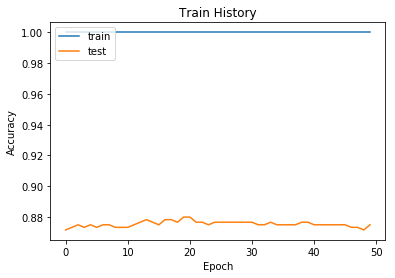

In [239]:
show_train_history('acc','val_acc')

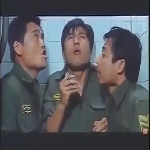

In [240]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../dataset/source/out/frame350.jpg', target_size= (150,150))
test_image

In [241]:
type(test_image)

PIL.Image.Image

In [242]:
test_image = image.img_to_array(test_image)

inputarray = test_image[np.newaxis,...] # dimension added to fit input size


In [243]:
result =  model.predict(inputarray)

In [244]:
print(result)
print("Predicted=%s", result)



[[0.]]
Predicted=%s [[0.]]


In [245]:
type(result)

numpy.ndarray

In [246]:
############################### new #####################3

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


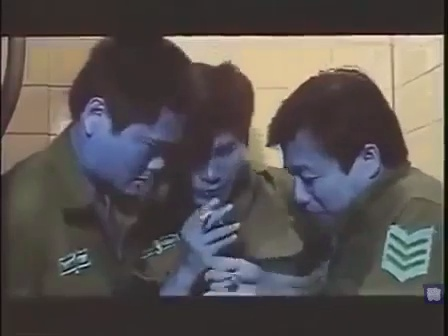

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


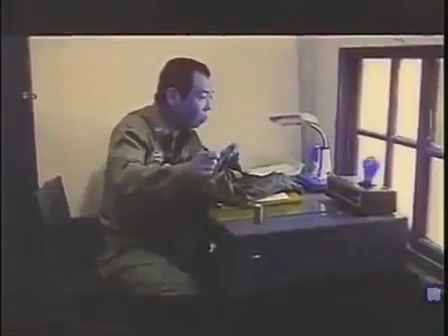

[[1.]]
Predicted=%s [[1.]]
smorking


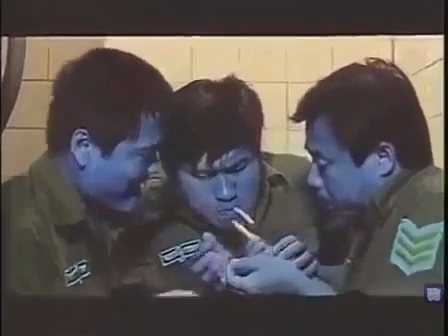

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[2.2950638e-23]]
Predicted=%s [[2.2950638e-23]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


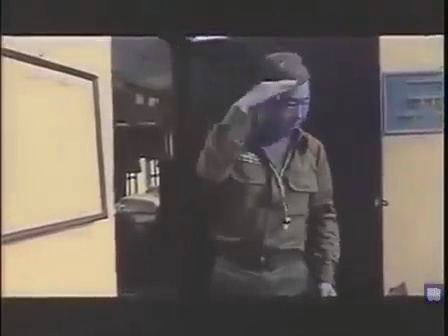

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


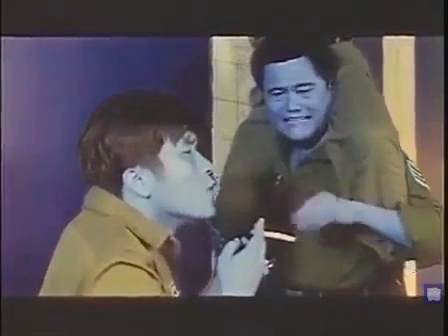

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


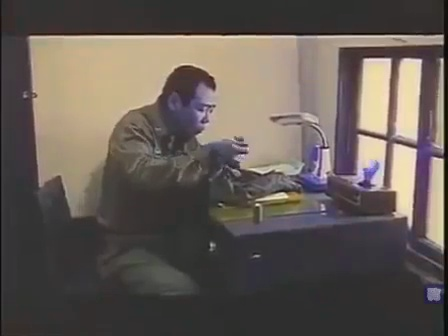

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


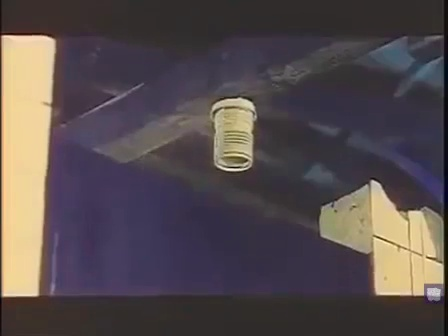

[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


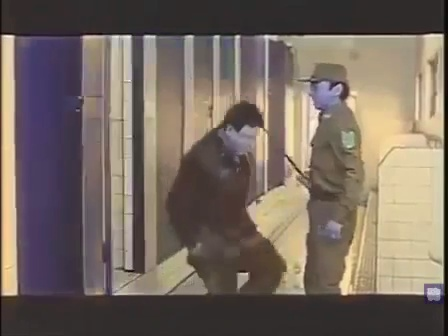

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


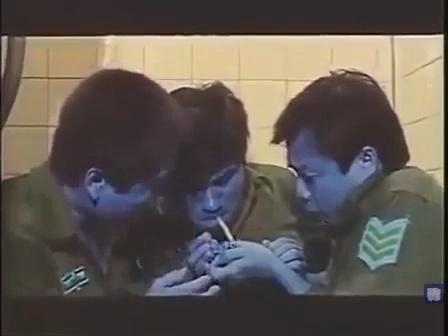

[[1.]]
Predicted=%s [[1.]]
smorking


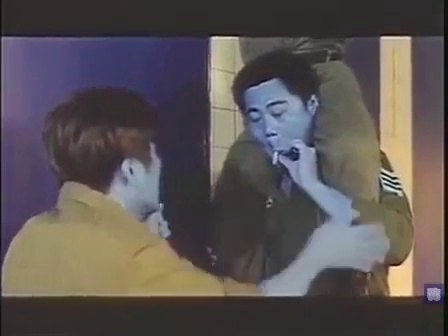

[[1.]]
Predicted=%s [[1.]]
smorking


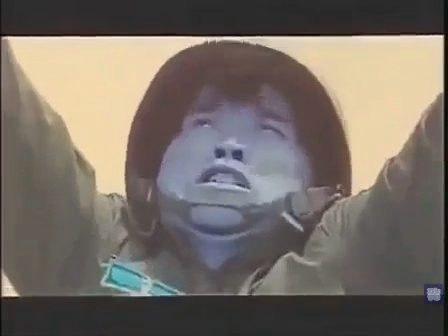

[[1.]]
Predicted=%s [[1.]]
smorking


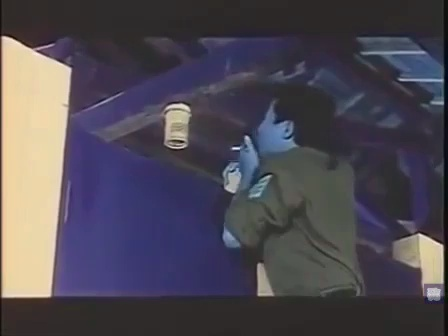

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


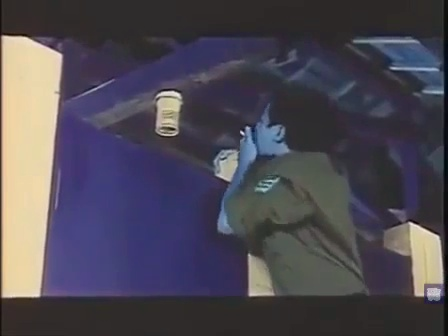

[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


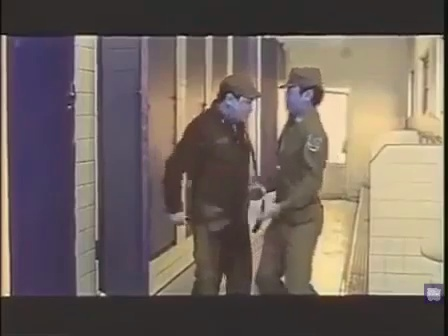

[[1.]]
Predicted=%s [[1.]]
smorking


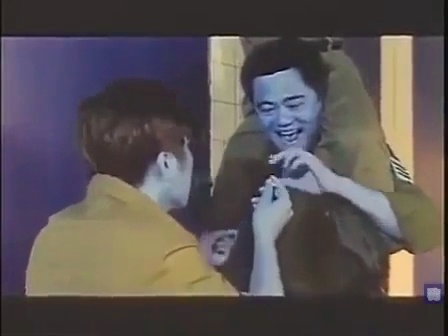

[[1.]]
Predicted=%s [[1.]]
smorking


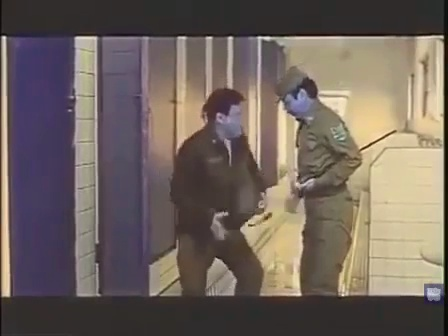

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.9999999]]
Predicted=%s [[0.9999999]]
smorking


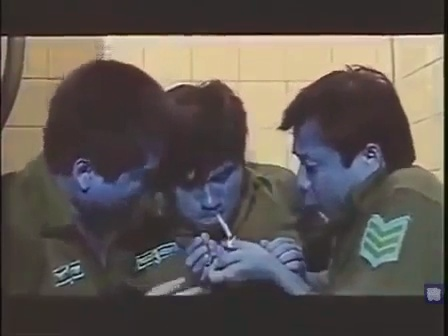

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


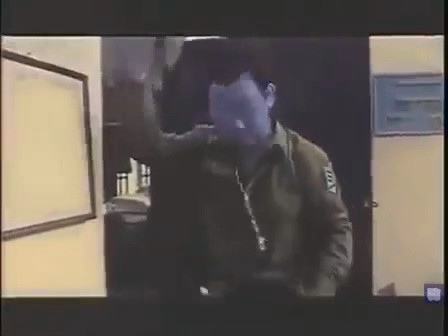

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


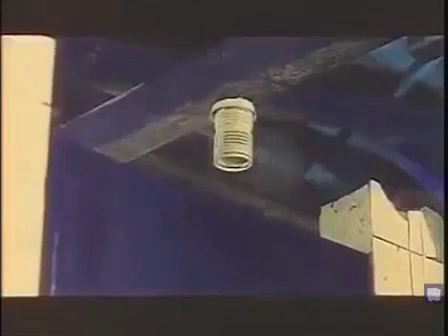

[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


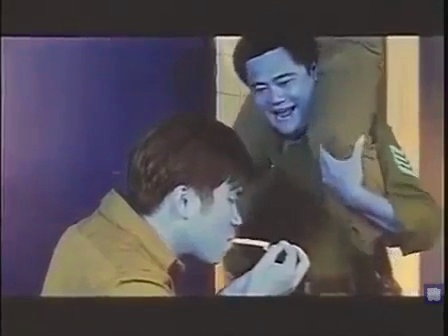

[[0.]]
Predicted=%s [[0.]]
no smorking
[[4.1507897e-36]]
Predicted=%s [[4.1507897e-36]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


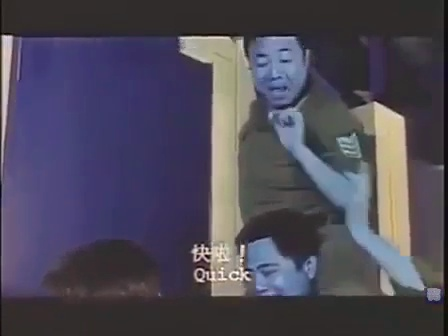

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


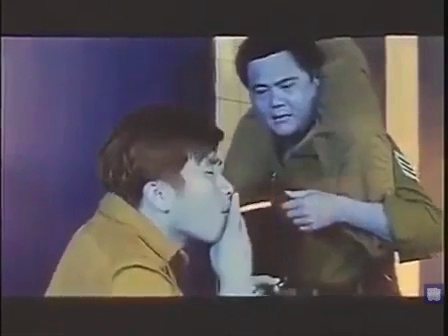

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


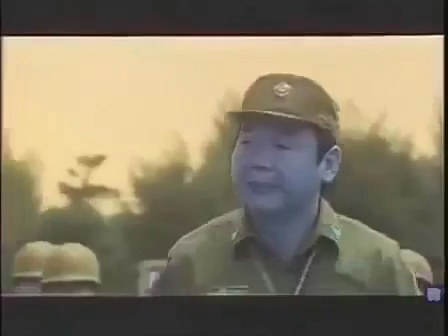

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


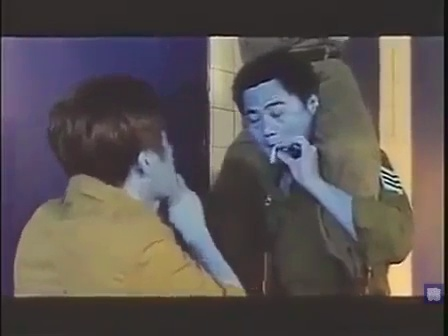

[[0.]]
Predicted=%s [[0.]]
no smorking
[[4.829095e-07]]
Predicted=%s [[4.829095e-07]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


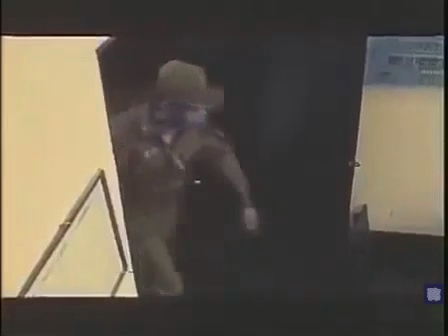

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


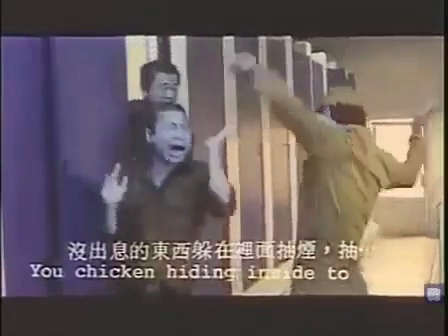

[[1.]]
Predicted=%s [[1.]]
smorking


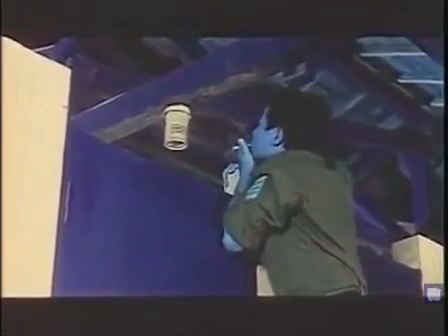

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


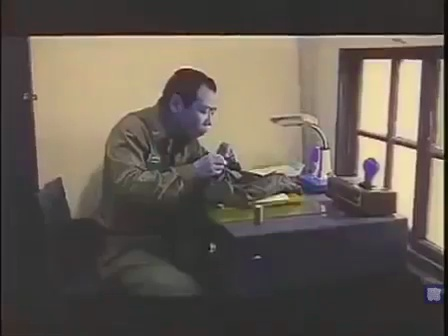

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


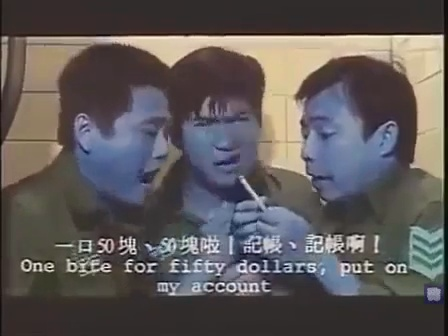

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


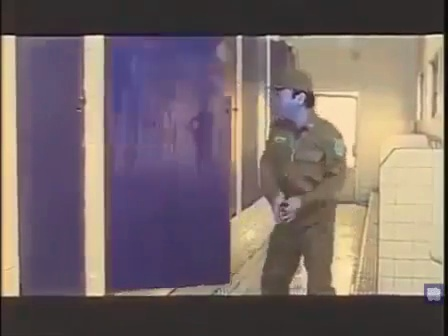

[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.6313349e-38]]
Predicted=%s [[1.6313349e-38]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[9.662805e-11]]
Predicted=%s [[9.662805e-11]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


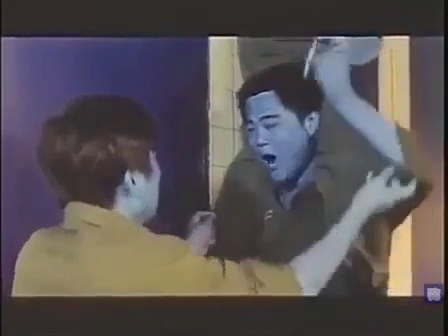

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


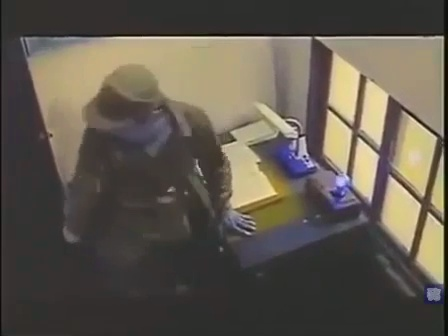

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


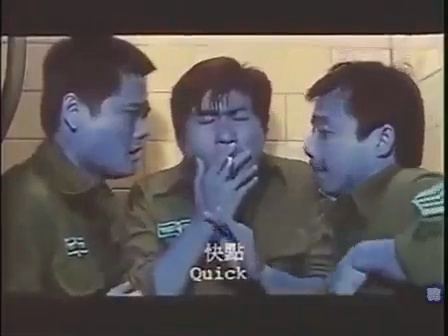

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


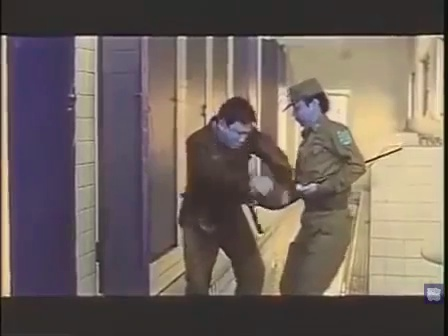

[[1.]]
Predicted=%s [[1.]]
smorking


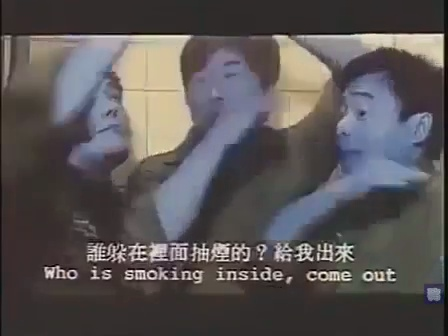

[[1.]]
Predicted=%s [[1.]]
smorking


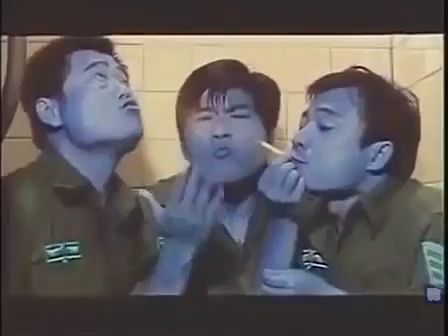

[[4.404812e-28]]
Predicted=%s [[4.404812e-28]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


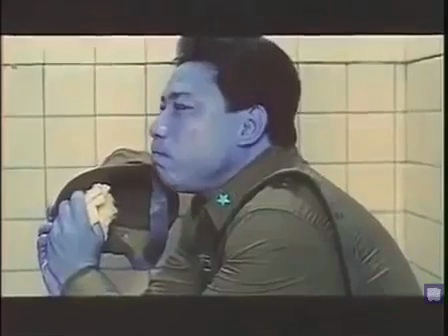

[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


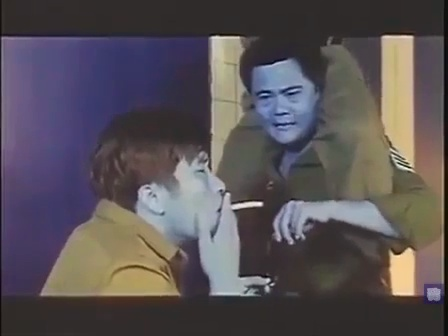

[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


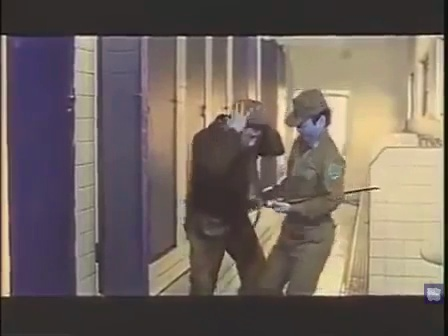

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[2.6182345e-25]]
Predicted=%s [[2.6182345e-25]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


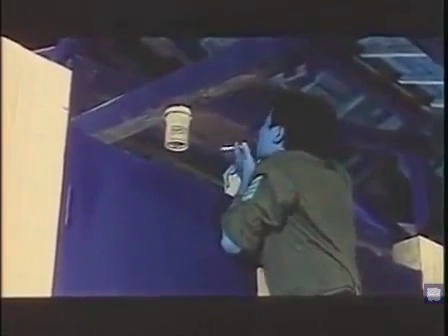

[[1.]]
Predicted=%s [[1.]]
smorking


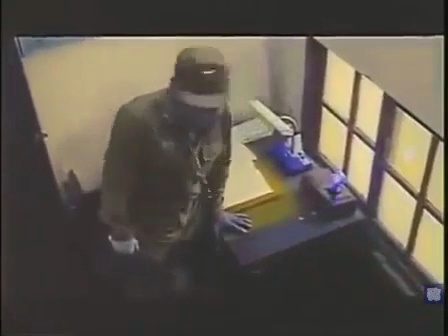

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


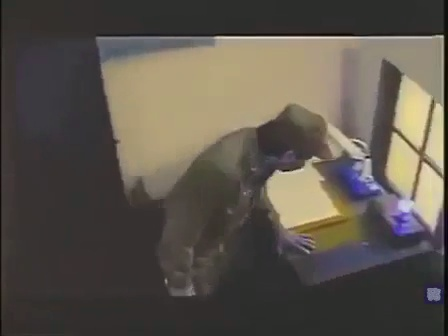

[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


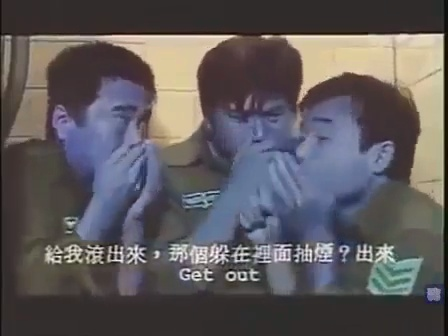

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


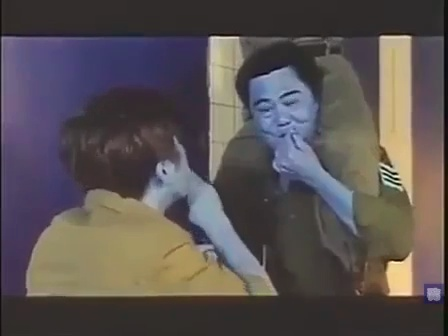

[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


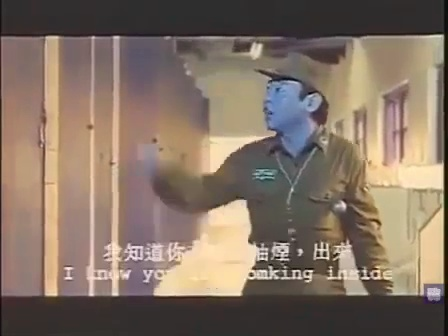

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


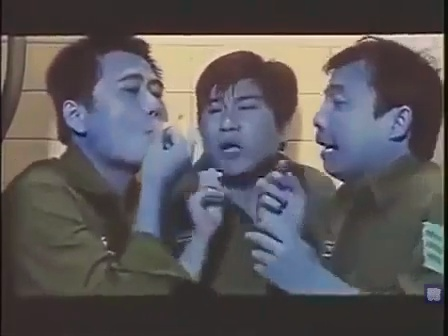

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[2.2331183e-21]]
Predicted=%s [[2.2331183e-21]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


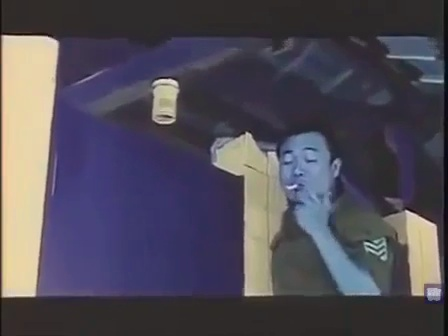

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


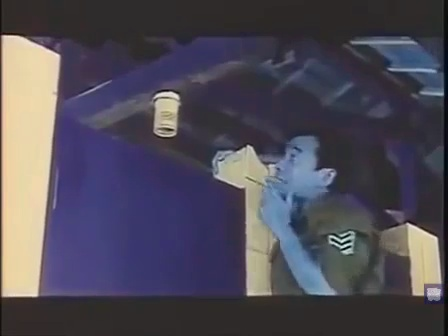

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


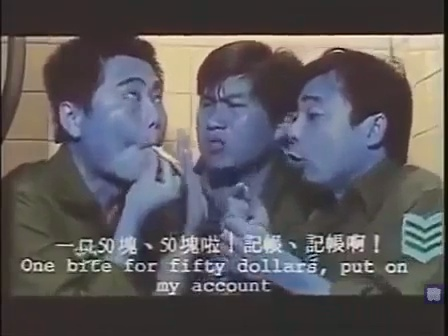

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[7.168304e-38]]
Predicted=%s [[7.168304e-38]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


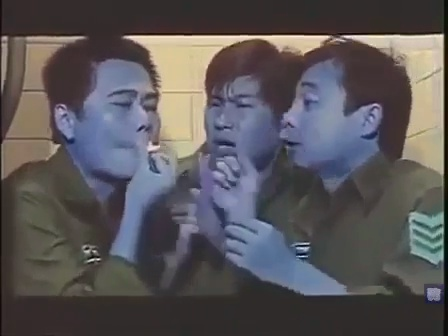

[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


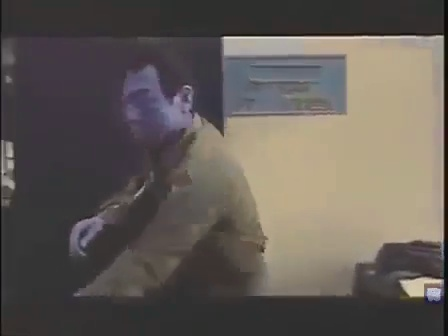

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


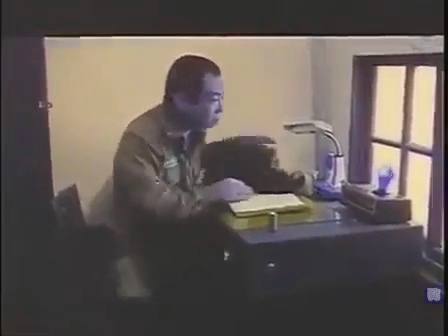

[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


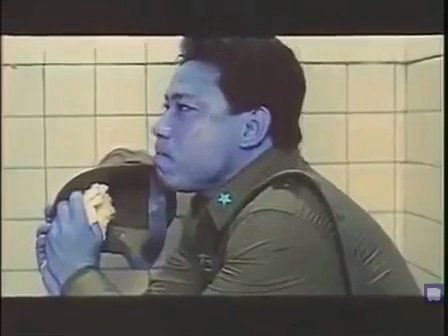

[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[0.]]
Predicted=%s [[0.]]
no smorking
[[1.]]
Predicted=%s [[1.]]
smorking


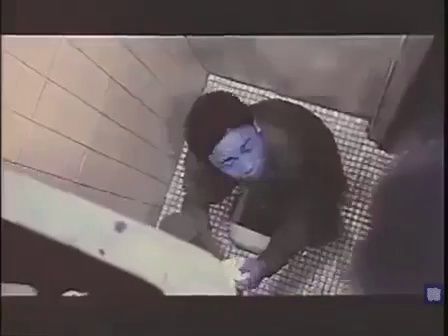

[[0.]]
Predicted=%s [[0.]]
no smorking


In [247]:
import os
import cv2
import time
  
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt
import glob
import numpy as np
from keras.preprocessing import image

from io import BytesIO
import PIL
from IPython.display import display, Image

for filename in glob.iglob('../dataset/source/out/*.jpg', recursive=True):

    test_image = image.load_img(filename, target_size= (150,150))
    test_image = image.img_to_array(test_image)
    inputarray = test_image[np.newaxis,...] # dimension added to fit input size
    result =  model.predict(inputarray)
    print(result)
    print("Predicted=%s", result)

    if result > 0.5:
        print ("smorking")
        img = cv2.imread(filename)
        #plt.imshow(img)
        im = PIL.Image.fromarray(img)
        bio = BytesIO()
        im.save(bio, format='png')
        display(Image(bio.getvalue(), format='png'))
    else:
        print ("no smorking")
 